# COGS 108 - Final Project 

# Overview

As a group, we wanted to dig deeper into whether or not there was any association between income inequality and the level of crime experienced in different cities in the United States. As we explored our data and applied tests to said data, we saw that there was indeed a difference in crime rates between areas that did versus did not experience income inequality. However, upon further testing, we saw that the correlation between income inequality and crime was quite weak, making income inequality a weak predictor for crime index.

# Names

- Jaclyn Chin
- Elisa Lau
- Samuel Parker
- Elise Wong
- Fiona Wong

###### Group Members IDs

- A14579160
- A12764321
- A13665511
- A13026941
- A13779845

# Research Question

We want to shed light on the effects of economic inequality on society, and see if it has any effect on crime rates. We can tackle this topic from a data science perspective by narrowing down the question a bit more. The data science question we are asking is the following:  What is the correlation between street crime and economic inequality in the US? 
    
There are some important things to note about how we defined our terms. Firstly, the kind of crime we are looking at includes forms of violent crime and street crime - things like muggings, theft, and perhaps even murder. We are not currently interested in things like speeding or white collar crime.

Secondly, we are looking at economic inequality, not poverty. While it is fairly obvious that poverty and crime are related (with desperation comes drastic measures), we are trying to tease out the effect of income inequality in and of itself. It could be that inequality contributes to the disintegration of communities and crime in a fashion that is independent from the sheer effect of poverty.  Perhaps one community might have more crime in it than another even though they both have similar levels of poverty, due to the fact that the one community has a substantial level of inequality. Indeed, it’s possible that an unequally distributed increase in wealth could catalyze an upswing in crime. This will no doubt require close inspection to properly disambiguate the effects of poverty from the effects of inequality.

## Background and Prior Work

Due to developments in our current political climate, discussion about the harms of income inequality has become increasingly prevalent. Popular politicians such as Alexandria Ocasio-Cortez and Bernie Sanders have shined the floodlights on the glaring cleft that lies between the richest Americans and the rest of us.  A quick look at the numbers will show that the divide between rich and poor is growing in this country (1). With the advent of this apparent fact, many have begun researching the various ways in which increased income inequality affects society. 

We’re not the first group of people  to investigate the relationship between crime and income inequality. According to David Luther from Zippia, in 2016, the FBI released crime rate statistics that showed correlation between city crime and income inequality (2). The study looks at FBI data about property crime and violent crime and concluded that income inequality correlates the strongest with crime compared to other variables such as unemployment, poverty, and number of high school graduates where there was only weak correlation. In this paper, the results also show that robbery and burglary in the US are strongly affected by income inequality (3). On a larger scale, this journal article also describes how violent crime and income inequality are positively correlated when looking at different countries (4).

We can add something of value to the larger conversation by getting a better idea of exactly what kinds of crime interact with economic inequality. Rather than look at an aggregate of property and violent crimes, we want to look at the specific types of crimes that might correlate with income inequality in the United States. Types of crime we are interested in investigating include assault, robbery, arson, rape, and hate crimes. In terms of income inequality, we can also look at the different types of ways that income inequality is measured to give more context to our findings. For instance, looking at the mean, median, and standard deviation of income for each location and taking into account the state Gini index (discussed more in the Data section below).

References (include links):
- 1) https://www.thebalance.com/income-inequality-in-america-3306190
- 2) https://www.zippia.com/advice/crime-income-inequality/
- 3) https://www.researchgate.net/publication/23648005_Income_inequality_and_crime_in_the_United_States
- 4) https://www.jstor.org/stable/10.1086/338347?seq=1#page_scan_tab_contents

# Hypothesis


We expect to find a positive correlation between the rate of street crime and economic inequality in the US. There are news articles all over the internet that speculate about this particular correlation. It is a relationship that governments, organizations, economists, and sociologists have all studied a fair amount. In particular, as stated in the NYU Dispatch’s article “How big is income inequality as a determinant of crime rates?” from May 23, 2018, “[a] 2002 study by The World Bank found that crime rates and inequality are positively correlated, and an increase in income inequality has the effect of intensely increasing crime rates.”

# Dataset(s)

# instructions
*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

- Dataset Name:
- Link to the dataset:
- Number of observations:

### Household Income Dataset
-Dataset Name: economic_data.csv
- Link to the dataset:https://statisticalatlas.com/United-States/Household-Income
- Number of observations: 10872


# SAM'S DATASCRAPING

### US Crime Dataset
- Dataset Name: UScrime_scraped.csv
- Link to the dataset: http://www.city-data.com/crime/index.html
- Number of observations: 9865

The data on US city crime was web scraped from City-Data which uses data from public records and agencies. Data for 9865 cities was scraped and 19 features for each city were collected (city, state, murders, rapes, burglarys, assaults, crime index, and more). There are total numbers of crimes committed per city, crimes per 100,000 population, and a crime index which is a value that gives more weight to certain crimes (for instance murder is weighted more heavliy than assault).

### Web Scraping for US Crime Data

In [ ]:
# Create empty arrays to fill with data
city = []
state = []
murders = []
murdersper = []
rapes = []
rapesper = []
robberies = []
robberiesper = []
assaults = []
assaultsper = []
burglaries = []
burglariesper = []
thefts = []
theftsper = []
auto_thefts = []
auto_theftsper = []
arsons = []
arsonsper = []
crime_index = []

# Array for city links while scraping each state
links = []

# No crime data for Hawaii
# States with only one link
states = ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'Colorado', 'Connecticut', 'Delaware', 'Iowa', 'Idaho',
          'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',  'Minnesota', 
          'Mississippi',  'Montana', 'Nebraska', 'Nevada', 'New-Hampshire',  'New-Mexico', 'North-Carolina', 
          'North-Dakota',  'Oklahoma', 'Oregon','Rhode-Island', 'South-Carolina', 'South-Dakota', 'Tennessee',
          'Utah','Vermont', 'Virginia', 'Washington', 'West-Virginia', 'Wyoming']

# States with multiple links
multstates = ['California', 'California2','Florida' , 'Florida2','Georgia', 'Georgia2', 'Illinois','Illinois2', 
              'Illinois3', 'Illinois4' , 'Michigan', 'Michigan2', 'Missouri', 'Missouri2','New-Jersey', 
              'New-Jersey2', 'New-York', 'New-York2','Ohio', 'Ohio2', 'Pennsylvania','Pennsylvania2', 
              'Pennsylvania3', 'Texas','Texas2', 'Texas3', 'Wisconsin', 'Wisconsin2']

# Loop through all of the states (this was done in two parts with states and multstates)
for currstate in multstates:
    # Make a get request
    response = rq.get('http://www.city-data.com/crime/crime-' + currstate + '.html', proxies=proxies)

    # Get the html for the state page
    page_html = bsoup(response.text, 'html.parser')

    # Get the names for all of the cities and put them into a list
    lstcities = page_html.find(id = 'content')
    list(lstcities.children)
    lstref = list(lstcities.children)[7]
    list(lstref.children)

    # Create list with all html links for each city
    for link in lstref.find_all('a'):
        links.append(link.get('href'))

for citylink in links:
    # Make a get request
    cityresponse = rq.get('http://www.city-data.com/crime/' + citylink, proxies=proxies)
    # Sleep for a random time between loops so website does not get spammed
    time.sleep(random.randint(8,15))
    
    # Get the html for the city and find the crime data we want (types of crime, crime per 100k people, crime index)
    crimesoup = bsoup(cityresponse.text, 'html.parser')
    crimehtml = list(crimesoup.children)[2]
    crimebody = list(crimehtml.children)[3]
    crimeol = list(crimebody.children)[9] 
    crimeli = list(crimeol.children)[9]

    # Get city and state name
    citystate = crimeli.get_text()
    citystate = citystate.split(',')
    citya = citystate[0]
    currcity = citya.replace('Crime rate in ', '')
    city.append(currcity)
    statea = citystate[1]
    stateb = statea.split('(')
    state.append(stateb[0].strip())
    
    # Find the crime table
    table = crimesoup.find(id="crimeTab")
    b = list(table.children)[5]
    
    # Find murder numbers
    murd = list(b.children)[1]
    c = 0
    for i in list(murd.children):
        c = c+1
    murdnum = list(murd.children)[c-1]

    # Find numbers for total murders in 2017 and murders per 100,000 people
    d = 0
    for j in list(murdnum.children):
        d = d+1
    if (d == 1):
        murders.append(float('NaN'))
        murdersper.append(float('NaN'))
    else:
        murdtotal = int(list(murdnum.children)[0].replace(',', ''))
        murdper = list(list(murdnum.children)[2])[0]
        murdper = murdper[1:]
        murdper = float(murdper[:-1].replace(',', ''))
        murders.append(murdtotal)
        murdersper.append(murdper)

    # Get rape numbers
    ra = list(b.children)[3]
    ranum = list(ra.children)[c-1]
    d = 0
    for j in list(ranum.children):
        d = d+1
    if (d == 1):
        rapes.append(float('NaN'))
        rapesper.append(float('NaN'))
    else:
        # Get numbers for total rapes in 2017 and rapes per 100,000 people
        ratotal = int(list(ranum.children)[0].replace(',', ''))
        raper = list(list(ranum.children)[2])[0]
        raper = raper[1:]
        raper = float(raper[:-1].replace(',', ''))
        rapes.append(ratotal)
        rapesper.append(raper)
    
    # Get robbery numbers
    rob = list(b.children)[5]
    robnum = list(rob.children)[c-1]
    
    d = 0
    for j in list(robnum.children):
        d = d+1
    if (d == 1):
        robberies.append(float('NaN'))
        robberiesper.append(float('NaN'))
    else:
        # Get numbers for total robberies in 2017 and robberies per 100,000 people
        robtotal = int(list(robnum.children)[0].replace(',', ''))
        robper = list(list(robnum.children)[2])[0]
        robper = robper[1:]
        robper = float(robper[:-1].replace(',', ''))
        robberies.append(robtotal)
        robberiesper.append(robper)
        
    # Get assault numbers
    assau = list(b.children)[7]
    assaunum = list(assau.children)[c-1]
    d = 0
    for j in list(assaunum.children):
        d = d+1
    if (d == 1):
        assaults.append(float('NaN'))
        assaultsper.append(float('NaN'))
    else:
        # Get numbers for total assaults in 2017 and assaults per 100,000 people
        assautotal = int(list(assaunum.children)[0].replace(',', ''))
        assauper = list(list(assaunum.children)[2])[0]
        assauper = assauper[1:]
        assauper = float(assauper[:-1].replace(',', ''))
        assaults.append(assautotal)
        assaultsper.append(assauper)
    
    # Get burlgary numbers
    bur = list(b.children)[9]
    burgnum = list(bur.children)[c-1]
    d = 0
    for j in list(burgnum.children):
        d = d+1
    if (d == 1):
        burglaries.append(float('NaN'))
        burglariesper.append(float('NaN'))
    else:
        # Get numbers for total burglaries in 2017 and burglaries per 100,000 people
        burgtotal = int(list(burgnum.children)[0].replace(',', ''))
        burgper = list(list(burgnum.children)[2])[0]
        burgper = burgper[1:]
        burgper = float(burgper[:-1].replace(',', ''))
        burglaries.append(burgtotal)
        burglariesper.append(burgper)
        
    # Get theft numbers
    thef = list(b.children)[11]
    theftnum = list(thef.children)[c-1]
    d = 0
    for j in list(theftnum.children):
        d = d+1
    if (d == 1):
        thefts.append(float('NaN'))
        theftsper.append(float('NaN'))
    else:
        # Get numbers for total thefts in 2017 and thefts per 100,000 people
        thefttotal = int(list(theftnum.children)[0].replace(',', ''))
        theftper = list(list(theftnum.children)[2])[0]
        theftper = theftper[1:]
        theftper = float(theftper[:-1].replace(',', ''))
        thefts.append(thefttotal)
        theftsper.append(theftper)
        
    # Get auto theft numbers
    authef = list(b.children)[13]
    autotheftnum = list(authef.children)[c-1]
    d = 0
    for j in list(autotheftnum.children):
        d = d+1
    if (d == 1):
        auto_thefts.append(float('NaN'))
        auto_theftsper.append(float('NaN'))
    else:
        # Get numbers for total auto thefts in 2017 and auto thefts per 100,000 people
        autothefttotal = int(list(autotheftnum.children)[0].replace(',', ''))
        autotheftper = list(list(autotheftnum.children)[2])[0]
        autotheftper = autotheftper[1:]
        autotheftper = float(autotheftper[:-1].replace(',', ''))
        auto_thefts.append(autothefttotal)
        auto_theftsper.append(autotheftper)
    
    # Get arson numbers
    ar = list(b.children)[15]
    arsonnum = list(ar.children)[c-1]
    d = 0
    for j in list(arsonnum.children):
        d = d+1
    if (d == 1):
        arsons.append(float('NaN'))
        arsonsper.append(float('NaN'))
    else:
        # Get numbers for total arsons in 2017 and arsons per 100,000 people
        arsontotal = int(list(arsonnum.children)[0].replace(',', ''))
        arsonper = list(list(arsonnum.children)[2])[0]
        arsonper = arsonper[1:]
        arsonper = float(arsonper[:-1].replace(',', ''))
        arsons.append(arsontotal)
        arsonsper.append(arsonper)
    
    # Get crime index numbers
    cind = list(b.children)[17]
    cindnum = list(cind.children)[0]
    d = 0
    for j in list(cindnum.children):
        d = d+1
    crate = list(cindnum.children)[d-1]
    crimeind = float(list(crate.children)[0])
    crime_index.append(crimeind)

# Create a dataframe with all of the crime data collected
crime = pd.DataFrame({
        'city': city,
        'state': state,
        'murders': murders,
        'murdersper100k': murdersper,
        'rapes': rapes,
        'rapesper100k': rapesper,
        'robberies': robberies,
        'robberiesper100k': robberiesper,
        'assaults': assaults,
        'assaultsper100k': assaultsper,
        'burglaries': burglaries,
        'burglariesper100k': burglariesper,
        'thefts': thefts,
        'theftsper100k': theftsper,
        'autothefts': auto_thefts,
        'autotheftsper100k': auto_theftsper,
        'arson': arsons,
        'arsonper100k': arsonsper,
        'crime index': crime_index
    })
crime

# Export the crime dataframe as a csv file
crime.to_csv('crime_scrapingmultstates4.csv')

### Gini Index Dataset

- Dataset Name: city_gini_index.csv
- Link to the dataset: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_17_5YR_B19083&prodType=table
- Number of observations: 3573

The Gini Index Dataset was downloaded from American Fact Finder which allows users to search for datasets colleted by the United States Census Bureau. The data is from the 2017 American Community Survey and it has 3573 cities with their ID, location, estimated Gini Index, and margin of error.

We plan to combine the crime and income inequality datasets by merging them based on city and state values.

# Setup

In [3]:
# Import libraries
import time
import random
from bs4 import BeautifulSoup as bsoup
import requests as rq
import re
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 10

# Data Cleaning

# Redo if only using city data *

After loading the crime data and the income data, it was necessary for us to extract the county and state within the url in the place column of income_county.csv. After extracting, it had to be re-arranged and changed to match up with the county_name column in our crime data's csv. Columns are then re-organized. Then, the income column & percentile column are cleaned up to be changed into ints, so we could pivot the data, making each percentile (20th, 40th, etc.) into a column and organizing our data more aesthetically and usefully. After cleaning the ata within the income_co

In [2]:
# Load crime data
df_crime = pd.read_csv('crime_data_w_population_and_crime_rate.csv')
df_crime

,county_name,crime_rate_per_100000,index,EDITION,PART,...,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,...,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,...,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,...,12,2,7629,17,3
...,...,...,...,...,...,...,...,...,...,...,...
3133,"Jerauld County, SD",0.000000,3134,1,4,...,1,0,2066,46,73
3134,"Cimarron County, OK",0.000000,3135,1,4,...,0,0,2335,40,25
3135,"Lawrence County, MS",0.000000,3136,1,4,...,0,0,12514,28,77


In [3]:
# Load income data
df_county_income = pd.read_csv('income_county.csv')
df_county_income

,Unnamed: 0,place,percentile,income,percent
0,0,https://statisticalatlas.com/county/Alabama/Au...,95th,"0 161,080.000000\rdtype: object",0 303.358\rdtype: object
1,1,https://statisticalatlas.com/county/Alabama/Au...,80th,"0 101,520.000000\rdtype: object",0 191.190\rdtype: object
2,2,https://statisticalatlas.com/county/Alabama/Au...,60th,"0 66,372.000000\rdtype: object",0 124.997\rdtype: object
...,...,...,...,...,...
16854,3,https://statisticalatlas.com/county/Wyoming/Te...,Median,"0 75,594.000000\rdtype: object",0 100.000\rdtype: object
16855,4,https://statisticalatlas.com/county/Wyoming/Te...,40th,"0 64,337.000000\rdtype: object",0 85.109\rdtype: object
16856,5,https://statisticalatlas.com/county/Wyoming/Te...,20th,"0 37,270.000000\rdtype: object",0 49.303\rdtype: object


In [4]:
# Extract county and state from url
df_county_income['countystate'] = df_county_income['place'].str.extract("county/(.*)/")
df_county_income['countystate'] = df_county_income['countystate'].str.replace("/", ",")
df_county_income['countystate']

0        Alabama,Autauga-County
1        Alabama,Autauga-County
2        Alabama,Autauga-County
                  ...          
16854      Wyoming,Teton-County
16855      Wyoming,Teton-County
16856      Wyoming,Teton-County
Name: countystate, Length: 16857, dtype: object

In [5]:
# Remove dash in between county names
df_county_income['countystate'] = df_county_income['countystate'].str.replace("-", " ")
df_county_income['countystate']

0        Alabama,Autauga County
1        Alabama,Autauga County
2        Alabama,Autauga County
                  ...          
16854      Wyoming,Teton County
16855      Wyoming,Teton County
16856      Wyoming,Teton County
Name: countystate, Length: 16857, dtype: object

In [6]:
# Extract county
df_county_income['county'] = df_county_income['countystate'].str.extract(",(.*)")
df_county_income['county']

0        Autauga County
1        Autauga County
2        Autauga County
              ...      
16854      Teton County
16855      Teton County
16856      Teton County
Name: county, Length: 16857, dtype: object

In [7]:
# Extract state
df_county_income['state'] = df_county_income['countystate'].str.extract("(.*),")
df_county_income['state']

0        Alabama
1        Alabama
2        Alabama
          ...   
16854    Wyoming
16855    Wyoming
16856    Wyoming
Name: state, Length: 16857, dtype: object

In [8]:
# Dictionary for state abbreviations
state_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# Abbreviate state
df_county_income['state_abbrev'] = df_county_income['state'].map(state_dict)
df_county_income['state_abbrev']

0        AL
1        AL
2        AL
         ..
16854    WY
16855    WY
16856    WY
Name: state_abbrev, Length: 16857, dtype: object

In [9]:
# Combine county and state abbreviation into one column called "county_name"
df_county_income['county_name'] = df_county_income['county'] + ', ' + df_county_income['state_abbrev']
df_county_income

,Unnamed: 0,place,percentile,income,percent,countystate,county,state,state_abbrev,county_name
0,0,https://statisticalatlas.com/county/Alabama/Au...,95th,"0 161,080.000000\rdtype: object",0 303.358\rdtype: object,"Alabama,Autauga County",Autauga County,Alabama,AL,"Autauga County, AL"
1,1,https://statisticalatlas.com/county/Alabama/Au...,80th,"0 101,520.000000\rdtype: object",0 191.190\rdtype: object,"Alabama,Autauga County",Autauga County,Alabama,AL,"Autauga County, AL"
2,2,https://statisticalatlas.com/county/Alabama/Au...,60th,"0 66,372.000000\rdtype: object",0 124.997\rdtype: object,"Alabama,Autauga County",Autauga County,Alabama,AL,"Autauga County, AL"
...,...,...,...,...,...,...,...,...,...,...
16854,3,https://statisticalatlas.com/county/Wyoming/Te...,Median,"0 75,594.000000\rdtype: object",0 100.000\rdtype: object,"Wyoming,Teton County",Teton County,Wyoming,WY,"Teton County, WY"
16855,4,https://statisticalatlas.com/county/Wyoming/Te...,40th,"0 64,337.000000\rdtype: object",0 85.109\rdtype: object,"Wyoming,Teton County",Teton County,Wyoming,WY,"Teton County, WY"
16856,5,https://statisticalatlas.com/county/Wyoming/Te...,20th,"0 37,270.000000\rdtype: object",0 49.303\rdtype: object,"Wyoming,Teton County",Teton County,Wyoming,WY,"Teton County, WY"


In [10]:
# Remove unneeded columns
df_county_income = df_county_income.drop(['place', 'countystate', 'county', 'state_abbrev'], axis=1)
df_county_income

,Unnamed: 0,percentile,income,percent,state,county_name
0,0,95th,"0 161,080.000000\rdtype: object",0 303.358\rdtype: object,Alabama,"Autauga County, AL"
1,1,80th,"0 101,520.000000\rdtype: object",0 191.190\rdtype: object,Alabama,"Autauga County, AL"
2,2,60th,"0 66,372.000000\rdtype: object",0 124.997\rdtype: object,Alabama,"Autauga County, AL"
...,...,...,...,...,...,...
16854,3,Median,"0 75,594.000000\rdtype: object",0 100.000\rdtype: object,Wyoming,"Teton County, WY"
16855,4,40th,"0 64,337.000000\rdtype: object",0 85.109\rdtype: object,Wyoming,"Teton County, WY"
16856,5,20th,"0 37,270.000000\rdtype: object",0 49.303\rdtype: object,Wyoming,"Teton County, WY"


In [11]:
# Reorder columns
df_county_income = df_county_income[['Unnamed: 0', 'county_name', 'state', 'percentile', 'income', 'percent']]
df_county_income

,Unnamed: 0,county_name,state,percentile,income,percent
0,0,"Autauga County, AL",Alabama,95th,"0 161,080.000000\rdtype: object",0 303.358\rdtype: object
1,1,"Autauga County, AL",Alabama,80th,"0 101,520.000000\rdtype: object",0 191.190\rdtype: object
2,2,"Autauga County, AL",Alabama,60th,"0 66,372.000000\rdtype: object",0 124.997\rdtype: object
...,...,...,...,...,...,...
16854,3,"Teton County, WY",Wyoming,Median,"0 75,594.000000\rdtype: object",0 100.000\rdtype: object
16855,4,"Teton County, WY",Wyoming,40th,"0 64,337.000000\rdtype: object",0 85.109\rdtype: object
16856,5,"Teton County, WY",Wyoming,20th,"0 37,270.000000\rdtype: object",0 49.303\rdtype: object


In [12]:
# Remove zeroes in income and percent columns
df_county_income['income'] = df_county_income['income'].replace({'0 ':''}, regex = True)
df_county_income['percent'] = df_county_income['percent'].replace({'0 ':''}, regex = True)
df_county_income

,Unnamed: 0,county_name,state,percentile,income,percent
0,0,"Autauga County, AL",Alabama,95th,"161,080.000000\rdtype: object",303.358\rdtype: object
1,1,"Autauga County, AL",Alabama,80th,"101,520.000000\rdtype: object",191.190\rdtype: object
2,2,"Autauga County, AL",Alabama,60th,"66,372.000000\rdtype: object",124.997\rdtype: object
...,...,...,...,...,...,...
16854,3,"Teton County, WY",Wyoming,Median,"75,594.000000\rdtype: object",100.000\rdtype: object
16855,4,"Teton County, WY",Wyoming,40th,"64,337.000000\rdtype: object",85.109\rdtype: object
16856,5,"Teton County, WY",Wyoming,20th,"37,270.000000\rdtype: object",49.303\rdtype: object


In [13]:
# Convert income to int
pd.options.mode.chained_assignment = None 
for i in range(0, len(df_county_income)):
    incomeConvert = df_county_income['income'][i]
    incomeConvert = incomeConvert[:(incomeConvert.find("."))]
    incomeConvert = incomeConvert.replace(',', "")
    incomeConvert = re.sub(r"^\s+", "", incomeConvert, flags=re.UNICODE)
    
    incomeConvert = int(float(incomeConvert))
    df_county_income['income'][i] = incomeConvert
    print(incomeConvert)    

161080
101520
66372
53099
41803
23134
121621
73783
44808
36027
29190
15692
140992
85487
54577
43786
33681
17063
120964
73230
48194
38248
30228
15983
135225
70630
43496
33351
25133
11677
172444
96323
57839
45056
33915
15362
157215
89956
55527
44263
33781
17111
137583
80154
49420
38400
30581
15931
129951
78730
48242
40293
31588
16568
133419
86812
60013
47422
37693
18503
150807
78387
49455
38941
30025
16360
133375
77809
43923
34665
25466
13337
137653
81881
48703
36507
28370
13785
121977
72193
46238
33092
24970
11355
129168
79875
53050
42589
32841
17041
114912
68872
42218
33381
25939
14093
132758
80508
49901
39955
31530
16656
119631
61987
33805
26829
20378
12336
162865
103361
70557
57632
47043
28436
133509
82887
51416
39836
30979
14960
176650
101275
67404
57032
44595
23338
138719
84450
51854
41699
32409
16012
238482
122820
74138
57952
44630
22503
217137
119102
75077
60889
49304
27621
213427
129958
91286
73814
59816
32767
250001
199394
125333
101173
78875
39465
178342
104648
66066
52943
413

96286
78500
56875
14700
250001
129250
79182
63992
47780
25233
140063
78500
44767
37917
26550
16969
137108
79068
48083
37902
30341
17000
230688
120667
68833
52292
41617
20955
151422
80612
50505
40340
32115
17432
159991
96082
59980
50145
37318
18494
151379
89120
57474
44878
34549
20171
180714
98780
61325
48683
38604
21381
215257
116636
74313
60373
48139
26237
139634
67532
43217
35865
27947
16201
141232
85761
52229
40090
31155
14116
132793
80006
56552
43635
33387
17427
155544
99433
60537
46978
37055
21456
193268
121777
85941
72661
60823
37472
139642
97894
63714
53902
42987
26729
250001
178286
113404
91470
75092
41628
184443
105003
73943
61020
48823
26413
166539
99337
66761
54263
44167
24888
250001
206589
138288
114329
94440
54607
202783
115716
75443
61147
49145
25741
162753
98194
70231
58284
47270
24916
153890
91316
60769
47898
36274
17130
190302
112801
74792
61468
50349
27518
137944
89889
57865
48116
39067
19508
125280
76264
49593
38092
29030
15327
123964
72452
47518
38703
31885
17783
16

36346
19692
161649
96357
61885
50502
39467
20418
147551
91250
57785
46090
37479
20681
150308
98808
64438
52724
42008
22105
188345
109773
69819
55717
43848
21965
183709
115772
76240
61754
48556
26111
149902
87006
56488
46313
35567
18750
156147
93442
63211
51449
42708
23279
115063
70318
43876
34656
27395
14522
132419
75115
49112
39759
30642
16401
118146
69637
43434
35284
28996
15894
175410
97709
63697
54787
45055
27501
150801
88309
55187
44288
34497
18780
155075
87314
55239
43097
33957
18204
119119
70089
45771
34080
27203
16258
237762
121371
74185
59268
46520
25725
250001
145004
81078
61130
47969
25176
135043
81927
53416
43010
34857
19908
137351
86064
55058
44140
34478
18850
241780
134509
87396
70620
55730
31578
122935
76112
47062
36993
29894
15841
211838
120291
81025
66057
52994
30851
175556
97449
67982
55625
44615
26838
200404
98500
63833
55068
44441
24794
203075
102260
60678
51280
39212
23044
148479
83477
50641
37313
27146
10841
239750
102650
66342
53929
41780
21411
139125
84286
57627

51627
27341
250001
171401
110433
89019
69353
33893
157120
97009
66486
55630
45213
25590
167325
95221
58297
45980
36120
19549
200003
112924
77076
62646
50732
28847
122402
72057
45556
35833
28217
15375
122094
71277
45992
38900
32523
19378
102115
61382
38618
30824
24502
12587
137177
79720
51571
42530
33312
20875
124834
77375
51950
43126
34804
19549
123492
72380
47502
39247
31072
17690
122511
75900
44745
36649
28937
15794
125369
73092
49560
40417
32916
19216
163740
94065
66860
53319
43347
23763
160461
97314
61817
51793
42919
19417
146353
89243
59262
48827
40094
23666
168272
96984
67586
55114
44552
26399
178125
108799
74516
62462
50637
28878
143742
90493
61129
51232
40094
22944
167911
95118
64743
53351
42755
23382
158590
93463
60991
48891
39417
22775
159496
95209
61373
49395
38311
20310
129206
74321
51789
42689
33191
18308
126741
71431
40380
31283
24513
12215
129731
64865
37331
31048
25699
13467
170179
108409
73169
60111
49617
28936
153150
82411
49681
38773
30170
15324
109933
56211
32097
26

50058
41457
24419
189004
114546
79993
64874
51413
28868
150375
95029
63931
52651
42478
24466
148188
97133
65802
54023
45142
27928
131198
81233
57018
44883
35623
20341
130586
76232
49817
40817
31391
17070
145875
90812
64041
52204
42755
25872
147565
86231
55778
46510
38556
20390
159450
101383
71487
59452
50224
28306
183022
100360
63090
52922
43621
23203
142278
87862
60983
49606
40245
23395
220319
115124
74754
56808
43447
20719
182547
101368
69963
59888
50064
29214
132221
85707
57831
47515
39908
22468
153732
87413
58173
46250
37300
20588
179583
105029
73675
63466
53478
31869
158813
99934
67160
56864
45762
28075
122172
76005
50359
40911
32814
19280
134780
86794
58212
41889
32625
19903
141425
87914
54382
43542
36773
23205
107147
68382
50833
37393
29583
17700
153227
80600
52544
45982
34797
20789
156458
94688
63977
55453
46475
26364
141000
86839
55100
44896
38341
18625
135125
84165
59026
47926
37360
22264
141679
84589
53862
44100
40078
22293
139388
82127
58113
46227
37618
26220
168975
94683
5

125011
76325
45665
36352
30637
15342
127481
78358
45926
35595
27749
14149
138460
80857
50994
39407
30249
16256
145743
83660
51127
40011
31274
16353
125233
66727
40335
31245
24815
12952
143799
72306
44044
36463
28655
17478
115682
65773
41474
30750
24087
12409
151614
80563
50271
40534
32128
17334
122087
72452
49888
38956
30821
16724
107638
63619
37173
30383
21642
11318
250001
164427
103824
82881
65682
34453
177799
101319
63180
49788
38104
20642
151715
87891
55511
43510
32328
17526
249005
144599
95845
76926
61505
32111
190023
109879
69196
55045
43062
22462
143257
77887
50255
38524
29829
17079
187020
96470
61539
50731
38713
21571
137865
76250
46652
37477
30551
17560
126542
63500
35063
26610
21198
12909
196245
114945
74504
60219
48839
27121
152733
79509
41663
33257
27155
15363
147218
79155
51924
42808
33818
18107
146485
88628
60340
49495
40549
24199
158750
99737
71640
56771
42320
23594
187424
119313
77247
63723
51015
28984
222312
128356
80063
62715
48822
24298
149456
94629
64522
53327
40561

13850
139014
72080
50267
41067
32051
16710
159378
87539
57097
45748
35451
19573
180731
98663
70794
56601
47661
22315
208321
103970
59936
46058
34116
15224
127785
76025
40367
34398
26847
15273
166656
100876
65423
54346
40619
19662
176787
94418
57782
46859
37291
20378
134163
88199
52088
40784
32525
17761
136875
96838
62117
51555
42362
26420
135896
78073
47683
36829
29638
16517
225152
129766
84227
67979
53570
30421
187750
112300
77083
59257
50649
21439
146067
89684
50843
41339
31899
18607
174560
98805
68064
55661
44497
27426
150292
95944
65846
50156
40333
22095
146719
96705
53088
39438
31500
15321
130043
79258
50647
39011
31095
16329
149160
83975
50455
38711
29862
14114
154979
101372
67850
54261
39121
20393
150674
97175
65657
55514
45897
28764
143227
81414
51301
43529
37557
19316
209596
117418
78531
64601
52610
29933
234170
126052
88379
71337
57069
33888
115556
73796
51345
39467
31587
18100
170323
93466
61295
50917
40435
21261
216243
141277
95381
79742
64337
39153
160196
86769
51347
42083

106575
64036
50399
38132
18557
139657
89116
59663
48838
39935
22092
174189
102289
66165
53459
43121
22726
158683
98462
64591
53432
42889
24665
140338
86565
58691
48003
38713
22953
142488
88161
56584
44587
35157
19097
142096
85688
57979
46992
38611
20892
180480
107826
68763
55985
43739
22659
140645
81037
49459
39936
31463
17453
159600
82481
51331
39231
29917
15550
195236
102479
66721
52222
38655
18038
121803
72105
46696
36067
27833
16884
151203
81789
48967
39701
30983
15404
172827
107391
71641
58673
46309
26489
190027
99740
61335
48987
38794
21293
143262
83545
54098
44351
35142
19357
140449
70950
47066
37880
29708
16820
199288
111023
68835
52015
39605
18485
135859
81320
52684
42052
33245
18731
144175
81100
50897
41951
33539
18218
218207
114161
72457
57449
44898
22681
220574
128918
84820
69743
55189
30597
181460
106556
70760
57068
45364
23955
198508
109861
68584
54407
41386
22027
183263
103207
67823
54968
44695
24986
152717
95666
61585
49116
38027
21244
161084
99037
68027
56191
46497
258

151313
94689
62450
51264
39955
24103
195328
123938
85782
72269
59544
35543
148021
89609
55197
45590
37282
20570
166422
97355
66951
55156
43926
24052
161525
108893
78678
67295
52893
26626
195915
108751
68490
54955
42827
22907
204358
122126
82166
67181
53055
29238
203655
116212
73533
59338
47317
25380
250001
171359
108794
87297
67885
33145
225559
134956
89808
72999
57561
32063
250001
177485
123242
105902
88420
47250
165494
97018
61620
48624
37792
19008
151458
71552
42133
36420
29153
16066
136791
83848
53409
43211
34141
17887
177844
104577
66681
52744
40918
20539
146370
91082
61005
49911
40835
22564
250001
190035
100968
75513
54397
21283
158241
93225
60253
49689
39074
21381
153413
93957
62924
50607
39328
21659
216877
110533
67394
54133
41348
19214
150962
88234
53711
43209
34265
18896
118621
68382
39189
30408
23027
11235
114045
72287
45932
38310
30431
16091
153271
89686
58271
47957
39530
21188
113060
68615
41433
32298
26159
13184
183710
96924
59083
46896
37168
20453
192617
103544
66472
539

35596
18978
110961
57000
35842
29071
22304
11283
186288
100725
61787
48899
36778
17013
132196
88310
58052
44281
36254
21024
141523
88913
56834
44745
36040
20563
144602
89994
57858
50077
40610
23236
151765
97462
65877
52738
41638
22127
250001
161920
100570
79886
63310
34481
134229
85464
54687
43427
34559
18712
145832
96253
65653
55750
46193
25652
196888
118379
79917
69160
53331
32376
137697
83892
51721
40290
31623
14248
178488
106507
73119
60178
48836
28772
149356
88606
60128
49151
39549
23299
131696
88775
59060
48069
40352
25109
143512
89468
63112
50096
41746
24404
147791
88102
59712
49692
41037
22520
136150
85167
56033
45153
35737
19205
140856
87884
59290
48546
38318
21515
169406
93401
64253
53947
46236
27527
127382
82394
56950
45646
36135
20927
128051
82808
56746
45388
37028
21310
117803
78416
50997
42418
34975
19091
153221
88961
59794
50418
42096
24893
142800
81910
51397
41221
31529
17090
139161
96125
65169
54837
45514
27794
154906
97761
65959
54513
43837
24658
157073
102332
70059
6

In [14]:
# Drop 'percent' column
# Make percentile columns 20th, 40th, Median, 60th, 80th, 95th
df_percentile = df_county_income.pivot_table(index=["state","county_name"], columns='percentile', values=['income'], aggfunc='first')
df_percentile.columns = df_percentile.columns.droplevel()
df_percentile = df_percentile.reset_index()
df_percentile.columns=df_percentile.columns.tolist()
df_percentile = df_percentile[['county_name','state','20th','40th','Median','60th','80th','95th']]
df_percentile

,county_name,state,20th,40th,Median,60th,80th,95th
0,"Autauga County, AL",Alabama,23134.0,41803.0,53099.0,66372.0,101520.0,161080.0
1,"Baldwin County, AL",Alabama,22306.0,40762.0,51365.0,63200.0,102624.0,184785.0
2,"Barbour County, AL",Alabama,12650.0,25159.0,33956.0,42331.0,74150.0,120688.0
...,...,...,...,...,...,...,...,...
2807,"Uinta County, WY",Wyoming,23020.0,43298.0,53323.0,64725.0,107642.0,163500.0
2808,"Washakie County, WY",Wyoming,22327.0,37790.0,46212.0,56745.0,84705.0,184527.0
2809,"Weston County, WY",Wyoming,18850.0,41792.0,55640.0,71908.0,101738.0,170917.0


In [15]:
# Merge income percentile dataframe with crime dataframe
df = pd.merge(df_percentile, df_crime, on=['county_name'])
df

,county_name,state,20th,40th,Median,...,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"Autauga County, AL",Alabama,23134.0,41803.0,53099.0,...,85,108,55246,1,1
1,"Baldwin County, AL",Alabama,22306.0,40762.0,51365.0,...,192,31,195540,1,3
2,"Barbour County, AL",Alabama,12650.0,25159.0,33956.0,...,21,0,27076,1,5
...,...,...,...,...,...,...,...,...,...,...,...
2780,"Uinta County, WY",Wyoming,23020.0,43298.0,53323.0,...,12,0,21066,56,41
2781,"Washakie County, WY",Wyoming,22327.0,37790.0,46212.0,...,1,0,8463,56,43
2782,"Weston County, WY",Wyoming,18850.0,41792.0,55640.0,...,5,0,7158,56,45


In [16]:
# Create inequality column: 95th minus 20th
inequality = [0]*len(df)
for i in range(0,len(df)):
    inequality[i] = df['95th'][i] - df['20th'][i]

df['income inequality'] = inequality  
df

,county_name,state,20th,40th,Median,...,ARSON,population,FIPS_ST,FIPS_CTY,income inequality
0,"Autauga County, AL",Alabama,23134.0,41803.0,53099.0,...,108,55246,1,1,137946.0
1,"Baldwin County, AL",Alabama,22306.0,40762.0,51365.0,...,31,195540,1,3,162479.0
2,"Barbour County, AL",Alabama,12650.0,25159.0,33956.0,...,0,27076,1,5,108038.0
...,...,...,...,...,...,...,...,...,...,...,...
2780,"Uinta County, WY",Wyoming,23020.0,43298.0,53323.0,...,0,21066,56,41,140480.0
2781,"Washakie County, WY",Wyoming,22327.0,37790.0,46212.0,...,0,8463,56,43,162200.0
2782,"Weston County, WY",Wyoming,18850.0,41792.0,55640.0,...,0,7158,56,45,152067.0


In [17]:
df.to_csv('income_county_crime.csv')

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

# instructions
YOUR CODE HERE
FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [9]:
# Import csv with crime and income data
crime_income_df = pd.read_csv('income_crime.csv')
crime_income_df.head()

,city,state,20th,40th,Median,...,autotheftsper100k,arson,arsonper100k,crime index,income inequality
0,Alabaster,Alabama,33578,61734,73325,...,63.2,NaN,NaN,115.9,143781
1,Albertville,Alabama,17270,27280,32042,...,416.9,NaN,NaN,200.0,111105
2,Anniston,Alabama,12553,22337,30539,...,501.0,NaN,NaN,1302.8,131285
3,Athens,Alabama,16777,33804,45920,...,46.1,NaN,NaN,140.2,182416
4,Auburn,Alabama,10718,26433,38912,...,155.8,NaN,NaN,217.4,187385


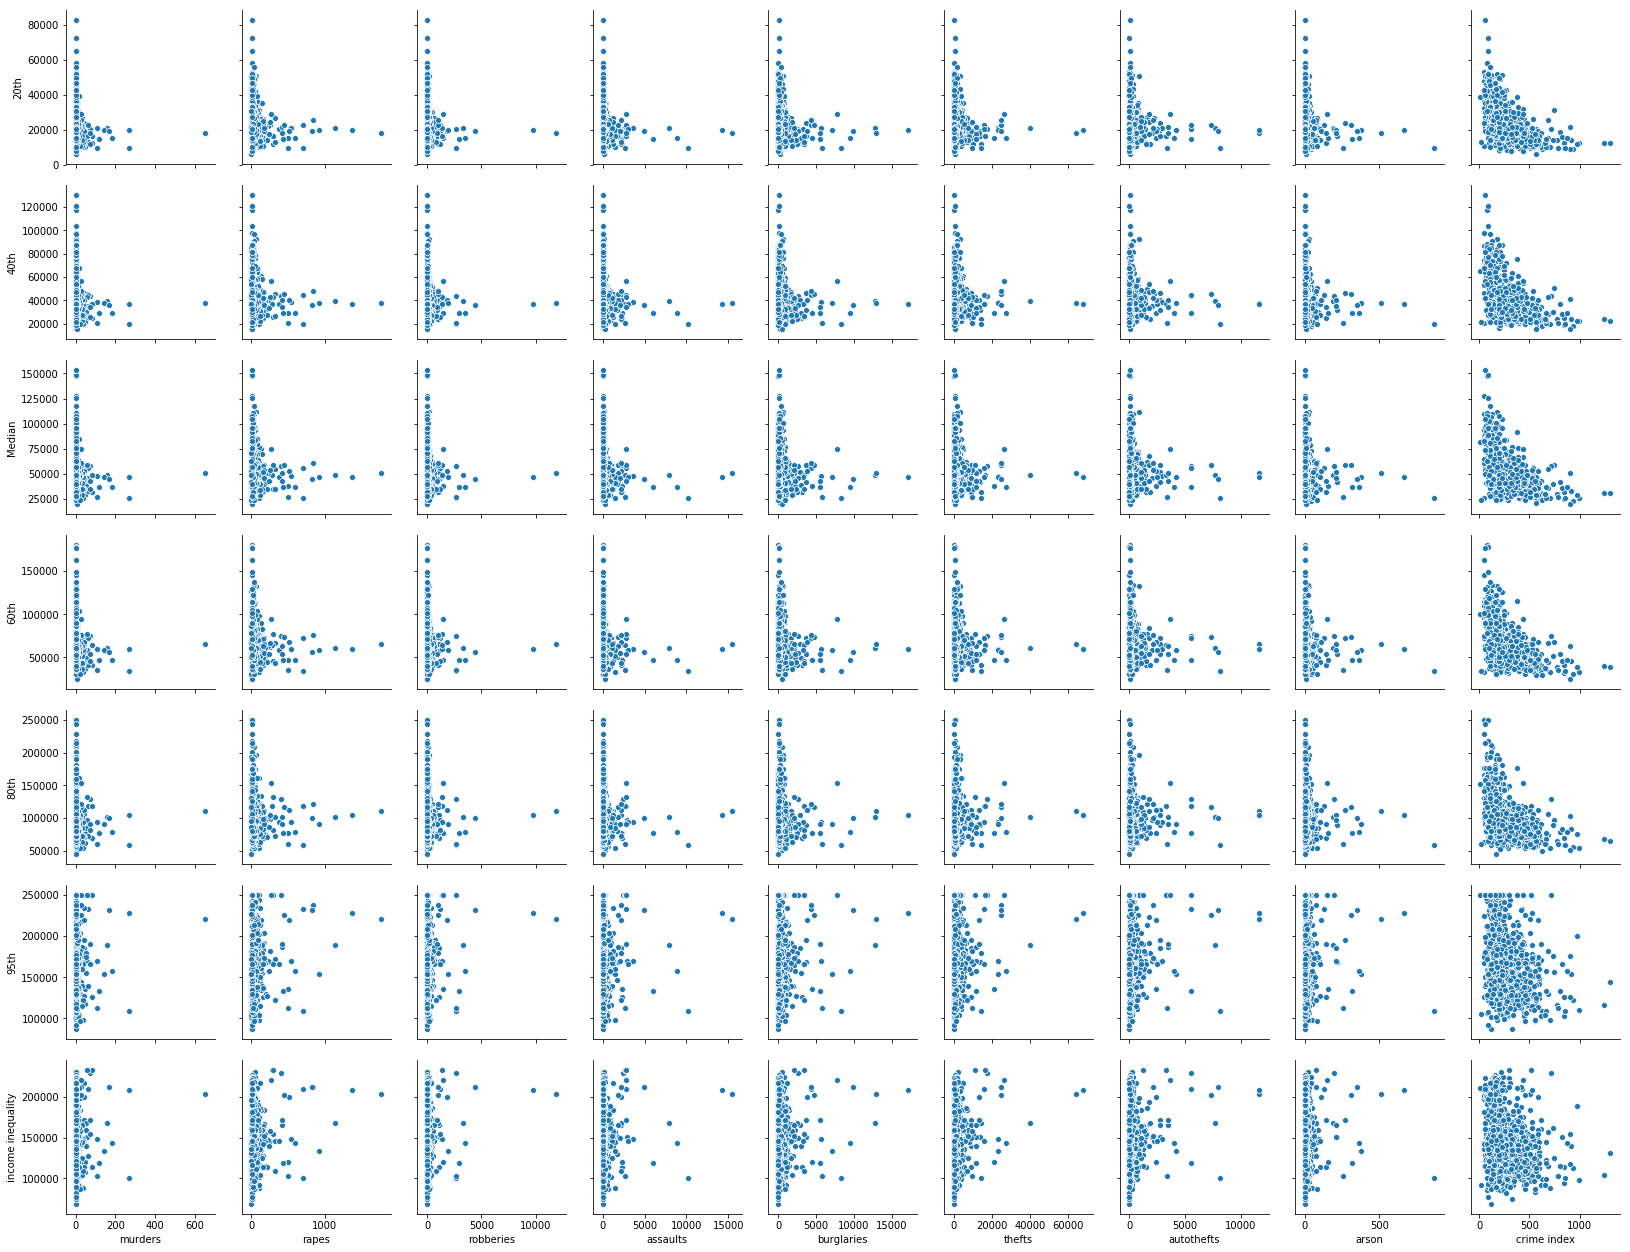

In [10]:
# Create a pair plot with income columns and total numbers for crime
sns.pairplot(crime_income_df, y_vars = ['20th', '40th', 'Median', '60th', '80th', '95th', 'income inequality'],
             x_vars = ['murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'thefts', 'autothefts', 'arson', 
                       'crime index'])

Upon visual speculation, there appears to be a higher density of crime in general in areas where income at the 20th, 40th, 60th, and 80th percentile are lower. Meanwhile, when we take a look at the 95th percentile for income, areas with higher 95th percentile incomes appear to experience more murders, rapes, robberies, burglaries, thefts. Inspecting income ineqality on crime, we can see that there appears to be a higher density of crime in areas with higher income inequality, which we suspected. Rapes, assaults, autothefts, and arson have a bit more scatter, but they still appear to have an overall trend of increasing as income inequality increases. Arson may possibly have an outlier with the point indicating the highest number of arsons at a relatively lower income inequality.

In [11]:
# Get general statistics for income and crime data
(crime_income_df.describe()).round()

,20th,40th,Median,60th,80th,...,autotheftsper100k,arson,arsonper100k,crime index,income inequality
count,924.0,924.0,924.0,924.0,924.0,...,923.0,866.0,866.0,924.0,924.0
mean,22906.0,41615.0,52190.0,64373.0,99164.0,...,232.0,15.0,15.0,274.0,143365.0
std,9625.0,15647.0,18687.0,21774.0,30441.0,...,221.0,54.0,20.0,165.0,34556.0
...,...,...,...,...,...,...,...,...,...,...,...
50%,20567.0,37912.0,48156.0,59792.0,92406.0,...,168.0,3.0,10.0,236.0,136314.0
75%,27436.0,48671.0,60354.0,73607.0,110632.0,...,294.0,10.0,20.0,352.0,163504.0
max,82565.0,130119.0,153253.0,180125.0,250001.0,...,2702.0,869.0,228.0,1303.0,233753.0


# Ethics & Privacy

For common problems among ethics and privacy when collecting data, many did not apply to our study, such as informed consent and collection bias, due to fact that we did not use human subjects for our projects and are using public & government datasets. 
However, ethical issues we may need to consider would include the disclosure of data of minors, for example the perpetrator of a juvenile crime. Perhaps we can use data where crimes of minors are included as long as identities are anonymous or unknown.
At first, we considered focusing our project solely on the crimes performed by persons of legal age, thus removing information about minors from our datasets. All of the data sets we have looked at right now are public datasets, so we should be fine as far as permissions are concerned. Any identifying information have already been redacted to maintain confidentiality.
In terms of bias, there could be bias in the crime reporting and data that we are looking at since it is collected by humans. We also have to be aware of the bias and cultural issues around reporting certain crimes such as rape or hate crimes.

Using a default ethics checklist to cross-reference possible issues, it
# double check if using kaggle data set and add something about how analysis results could be used for laws and policy that negatively affect people
For other ethical issues to consider is honest representation of the data and consider if the data we've grabbed from public sources(Kaggle) and the government are always reliable. From checking the source on Kaggle we've implemented, there were listed sources from this scraped code. For crime, it was ICPSR of UMich, and as it is an established university, we're making the assumption that the data is reliable and permission was gathered. The other source is from the US Census Bureau, a public government source.
In terms of whether our research can indirectly harm others and serve as a source for others to profit off of, it's possible that there's always a chance to represent a source incorrectly. However, what we'll do to at least control some of this possibility is to not make outlandish claims from our data and stick with a factual conclusion truly based on what the data is showing. 

References:
1) http://deon.drivendata.org/#default-checklist
2) https://www.icpsr.umich.edu/icpsrweb/
3) https://census.gov/

# Conclusion & Discussion

*Fill in your discussion information here*